<a href="https://colab.research.google.com/github/BoKna031/GoogleColabFunProjects/blob/master/Card_extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [25]:
CARD_FOLDER_NAME = "cards"
TEMPLATE_FORMAT = ".png"
TEMPLATE_FILE_NAME = "card-template" + TEMPLATE_FORMAT

MIN_CARD_AREA = 10000

In [48]:
import os
import shutil

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Možete dodati i druge podržane formate slika
            img = cv2.imread(os.path.join(folder, filename))
            if img is not None:
                images.append(img)
    return images

def save_images_to_folder(images, folder):
  if os.path.exists(folder):
    shutil.rmtree(folder)
  os.makedirs(folder)

  for i, img in enumerate(images):
    cv2.imwrite(os.path.join(folder, f"image_{i}" + TEMPLATE_FORMAT), img)

def zip_folder(folder_path, output_filename):
  if not os.path.exists(folder_path):
      print(f"Folder '{folder_path}' not found.")
      return

  shutil.make_archive(output_filename, 'zip', folder_path)
  print(f"Folder '{folder_path}' successfully zipped as '{output_filename}.zip'.")

In [11]:
def show_img(img, gray = False):
  if gray:
    plt.imshow(img, 'gray')
  else:
    plt.imshow(img)
  plt.axis('off')
  plt.show()

In [12]:
def create_template_pages(total_num_of_cards, cards_per_page, base_img):
  pages = (total_num_of_cards // cards_per_page) + 1
  templates = []
  for p in range(pages):
    templates.append(base_img.copy())
  return templates

# Yu-Gi-Oh printable pages generator

In [13]:
template_img = cv2.imread('./' + TEMPLATE_FILE_NAME)

In [14]:
gray_template = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
#show_img(gray_template, True)

In [15]:
ret,mask = cv2.threshold(gray_template,200,255,cv2.THRESH_BINARY) #exlude white background
mask = 255 - mask

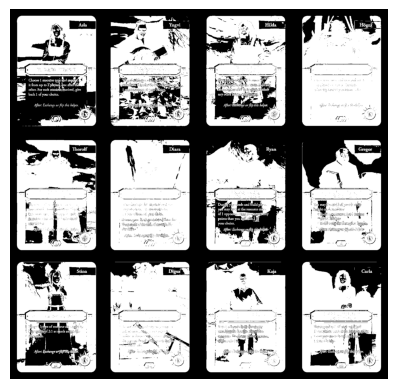

In [16]:
show_img(mask, True)

In [17]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [18]:
cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED);

In [19]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

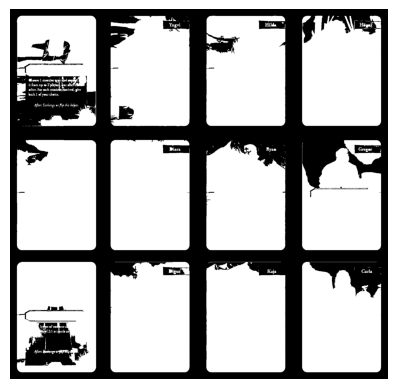

In [20]:
show_img(mask, 'gray')

In [32]:
image_with_contours = cv2.cvtColor(template_img.copy(), cv2.COLOR_BGR2RGB)
found_cards = []
for i, contour in enumerate(contours):
    if cv2.contourArea(contour) < MIN_CARD_AREA:  # Preskoči konture koje su previše male
        continue
    x, y, w, h = cv2.boundingRect(contour)  # Dobijanje bounding box-a
    card = image_with_contours[y:y+h, x:x+w]  # Sečenje karte
    found_cards.append(card)

In [34]:
len(found_cards)

12

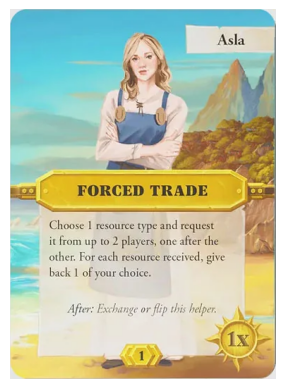

In [46]:
show_img(found_cards[11])

In [47]:
save_images_to_folder(found_cards, CARD_FOLDER_NAME)

In [49]:
zip_folder("cards", "cards")

Folder 'cards' successfully zipped as 'cards.zip'.
